In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import pdb
import numpy as np
import numpy.random as npr
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools

In [2]:
import scipy.io
mat = scipy.io.loadmat(p+'/data/rnn/multitask/armNet/condsForSimJ2moMuscles.mat')
J = scipy.io.loadmat(p+'/data/rnn/multitask/armNet/JandNcomboNs.mat')

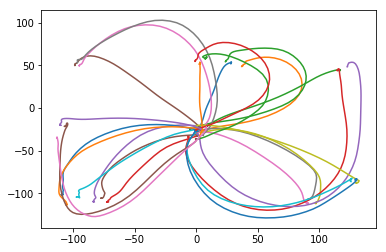

In [286]:
for x in range(27):
    plt.plot(J['comboNjs'][0]['cond'][0]['protoTrial'][0][x][0][0][7],
             J['comboNjs'][0]['cond'][0]['protoTrial'][0][x][0][0][8])

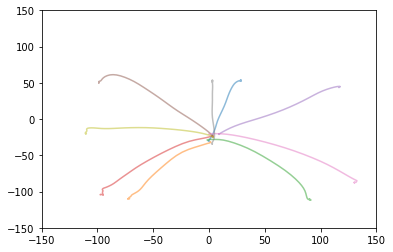

In [287]:
for x in range(0,27,3):
#     fig = plt.figure(figsize=(5, 5))
    plt.plot(J['comboNjs'][0]['cond'][0]['protoTrial'][0][x][0][0][7],
             J['comboNjs'][0]['cond'][0]['protoTrial'][0][x][0][0][8],alpha = .5)
    plt.xlim([-150,150])
    plt.ylim([-150,150])

In [318]:
mat.keys()

['condsForSim', '__version__', '__header__', '__globals__']

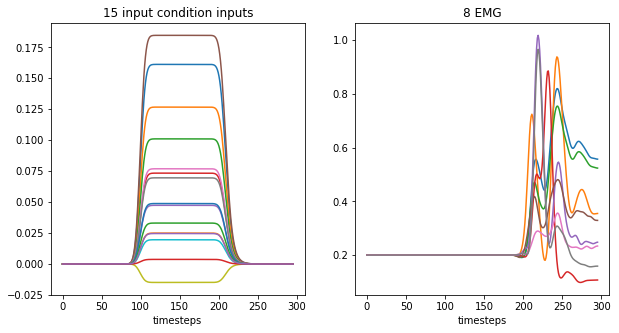

In [288]:
reach_condition = 1
mystery = 0 # not sure what this is, appears to be duplicated 8 times w same data entries

fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1,2,1)
plt.plot(mat['condsForSim'][reach_condition][mystery]['plan'])
plt.title('15 input condition inputs')
plt.xlabel('timesteps')
ax1 = plt.subplot(1,2,2)
plt.plot(mat['condsForSim'][reach_condition][mystery]['muscle'])
plt.title('8 EMG')
plt.xlabel('timesteps')
plt.show()

In [321]:
J['comboNjs'][0]['cond'][0]['protoTrial']

array([[array([[(array([[0]], dtype=uint8), array([[65]], dtype=uint8), array([[(array([[1]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[12]], dtype=uint8), array([[11]], dtype=uint8), array([[3]], dtype=uint8), array([[27]], dtype=uint8), array([[82]], dtype=uint8), array([[13]], dtype=uint8), array([[16]], dtype=uint8), array([[3]], dtype=uint8), array([[1]], dtype=uint8), array([[37]], dtype=uint8), array([[80]], dtype=uint8), array([[677]], dtype=uint16), array([[625]], dtype=uint16), array([[1250]], dtype=uint16), array([[700]], dtype=uint16), array([[175]], dtype=uint8), array([[0]], dtype=uint8), array([[(array([[1]], dtype=uint8), array([[0]], dtype=uint8))]],
      dtype=[('numberUsed', 'O'), ('values', 'O')]), array([[35]], dtype=uint8), array([[80]], dtype=uint8), array([[35]], dtype=uint8), array([[0]], dtype=uint8), array([[35]], dtype=uint8), array([[-200]], dtype=int16), array([[200]], dtype=uint8), array([[-155]], dtype=int16), array([[1

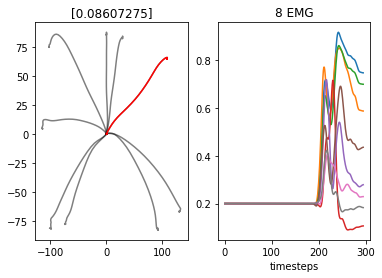

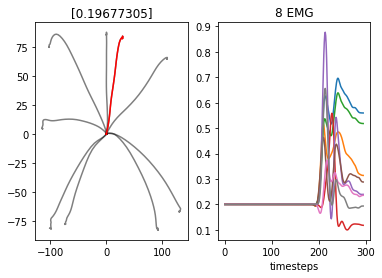

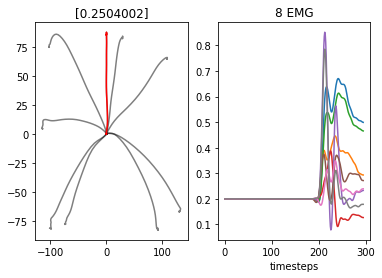

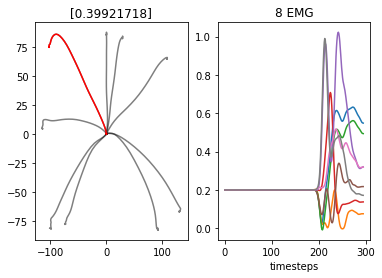

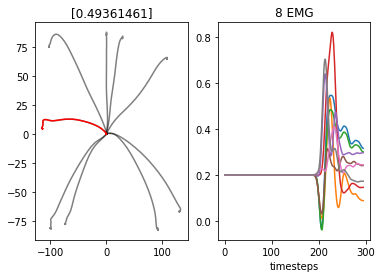

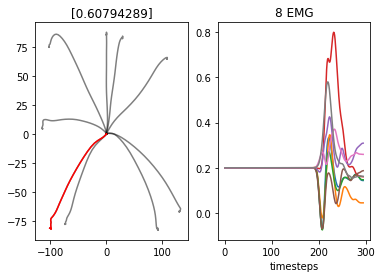

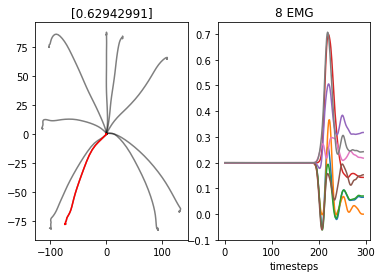

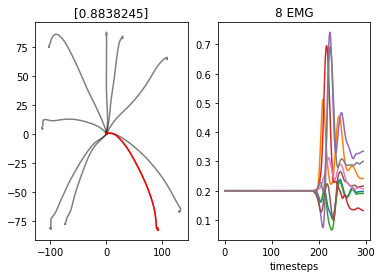

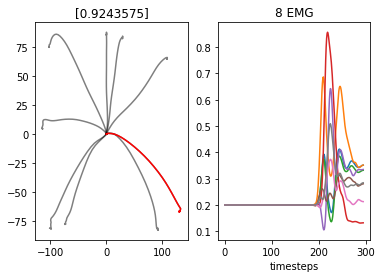

In [289]:
mystery=0

reach_condition_list = [12,0,21,15,24,9,3,6,18]
for reach_condition in reach_condition_list:
    ax1 = plt.subplot(1,2,1)
    
    for x in range(0,27,3):
        x_backg = J['comboNjs'][0]['cond'][0]['protoTrial'][0][x][0][0][7] - J['comboNjs'][0]['cond'][0]['protoTrial'][0][x][0][0][7][0]
        y_backg = J['comboNjs'][0]['cond'][0]['protoTrial'][0][x][0][0][8] - J['comboNjs'][0]['cond'][0]['protoTrial'][0][x][0][0][8][0]
    
        plt.plot(x_backg,y_backg,'k',alpha = .5)
        
    x = J['comboNjs'][0]['cond'][0]['protoTrial'][0][reach_condition][0][0][7] - J['comboNjs'][0]['cond'][0]['protoTrial'][0][reach_condition][0][0][7][0]
    y = J['comboNjs'][0]['cond'][0]['protoTrial'][0][reach_condition][0][0][8] - J['comboNjs'][0]['cond'][0]['protoTrial'][0][reach_condition][0][0][8][0]
    
    plt.plot(x,y,'r')
    

    ang= np.arctan2(y[-1],x[-1])/(2*np.pi)
    if ang<0:
            ang = 1+ang
            
    plt.title(str(ang))

    ax1 = plt.subplot(1,2,2)
    plt.plot(mat['condsForSim'][reach_condition][mystery]['muscle'])
    plt.title('8 EMG')
    plt.xlabel('timesteps')
    plt.show()

In [291]:
ang = np.zeros(len(reach_condition_list))
trial_n = np.zeros(len(reach_condition_list))
for ri in range(len(reach_condition_list)):

        
    reach_condition = reach_condition_list[ri]
    
    x = J['comboNjs'][0]['cond'][0]['protoTrial'][0][reach_condition][0][0][7] - J['comboNjs'][0]['cond'][0]['protoTrial'][0][reach_condition][0][0][7][0]
    y = J['comboNjs'][0]['cond'][0]['protoTrial'][0][reach_condition][0][0][8] - J['comboNjs'][0]['cond'][0]['protoTrial'][0][reach_condition][0][0][8][0]

    ang[ri] = np.arctan2(y[-1],x[-1])/(2*np.pi)
    if ang[ri]<0:
            ang[ri] = 1+ang[ri]
    trial_n[ri] = int(np.floor(800*ang[ri]))
    

In [327]:
np.concatenate((range(int(trial_n[reachi_first]),total_n_reach),range(0,int(trial_n[reachi_last]))))

array([739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751,
       752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764,
       765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777,
       778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790,
       791, 792, 793, 794, 795, 796, 797, 798, 799,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67])

In [328]:
n_muscles = np.shape(mat['condsForSim'][reach_condition][0]['muscle'])[1]
total_n_reach = 800
timesteps = 150

emg_big = np.zeros((timesteps,total_n_reach,n_muscles))

for ri in range(len(reach_condition_list)):
    
    reachi_first = ri
    emg_first = mat['condsForSim'][reach_condition_list[reachi_first]][0]['muscle']

    reachi_last = (ri+1)%len(trial_n)
    emg_last = mat['condsForSim'][reach_condition_list[reachi_last]][0]['muscle']
        
    if trial_n[reachi_first]>trial_n[reachi_last]:
        inds = np.concatenate((range(int(trial_n[reachi_first]),total_n_reach),range(0,int(trial_n[reachi_last]))))
    else:
        inds = range(int(trial_n[reachi_first]),int(trial_n[reachi_last]),1)

    n_interps = len(inds)

    for mi in range(n_muscles):
        for x in range(50):
            emg_big[x,inds,mi] = np.linspace(emg_first[x+135,mi],emg_last[x+135,mi],n_interps)
            
        for x2 in range(100):
            emg_big[50+x2,inds,mi] = np.linspace(emg_first[x2+185,mi],emg_last[x2+185,mi],n_interps)
        

In [ ]:
n_reach = len(reach_condition_list)
n_interps = 100
cmap = plt.get_cmap('rainbow')
for muscle in range(1):
    for x1 in range(n_reach-1):
        fig = plt.figure(figsize=(10, 5))
        for x in range(n_interps):
            plt.plot(emg_big[x+x1*n_interps,:,muscle],c = cmap(x/n_interps),alpha = .2, linewidth = 4)

IndexError: index 150 is out of bounds for axis 0 with size 150

In [298]:
arm_dict = np.load(p+'/data/rnn/multitask/armNet/arm_dict_800.npy').item()

emg_dict = {}
emg_dict['outputs'] = emg_big[:,:,:6]
emg_dict['targ_theta'] = arm_dict['targ_theta']
emg_dict['targets'] = arm_dict['targets']
emg_dict['position'] = arm_dict['position']

In [299]:
filename = p+'/data/rnn/multitask/armNet/emg_dict_800.npy'
np.save(filename,emg_dict)

In [300]:
emg_dict = np.load(p+'/data/rnn/multitask/armNet/emg_dict_800.npy').item()

In [301]:
np.shape(arm_dict['outputs'])

(800, 180, 6)

In [282]:
emg_big = arm_dict['outputs']

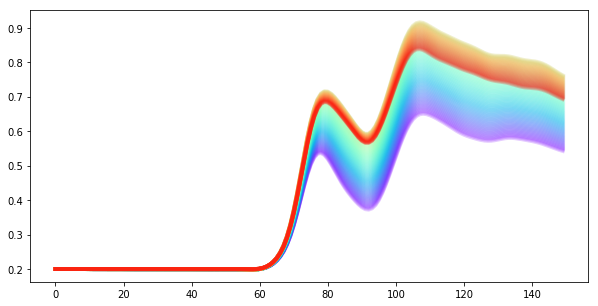

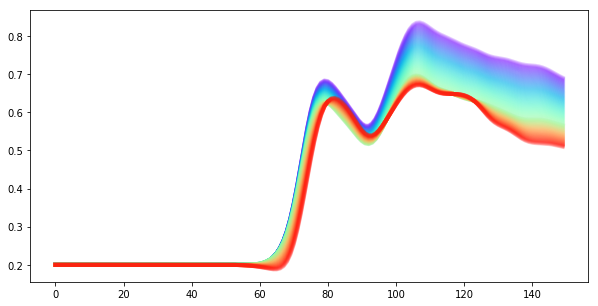

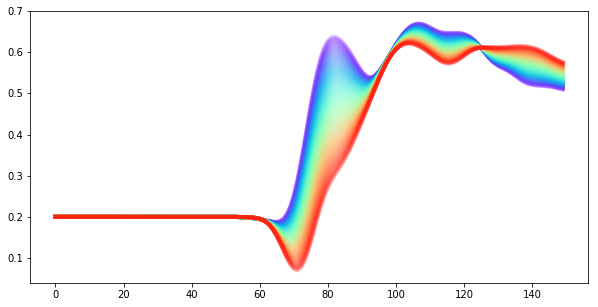

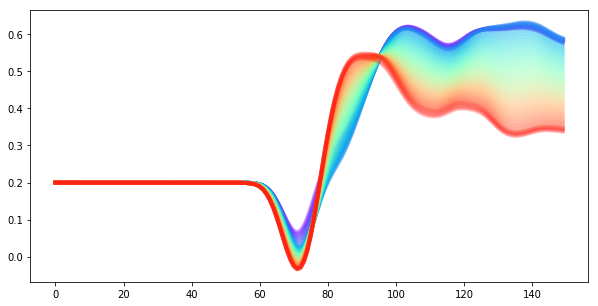

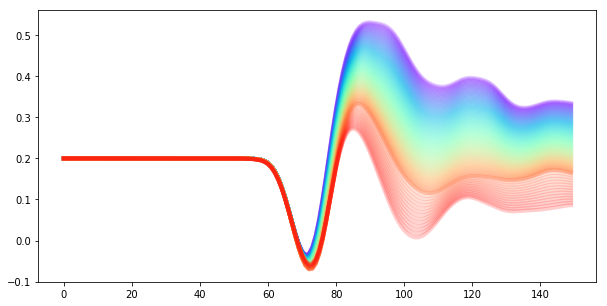

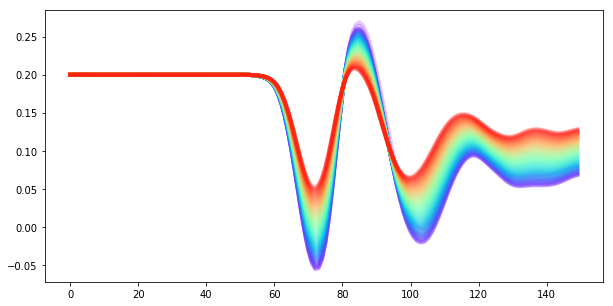

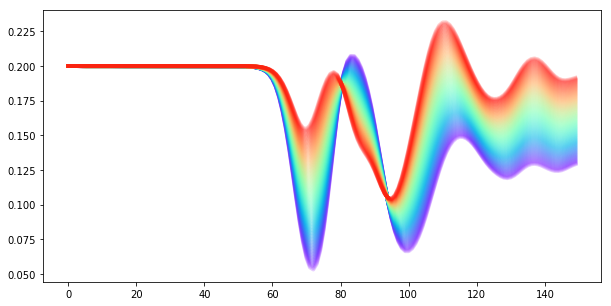

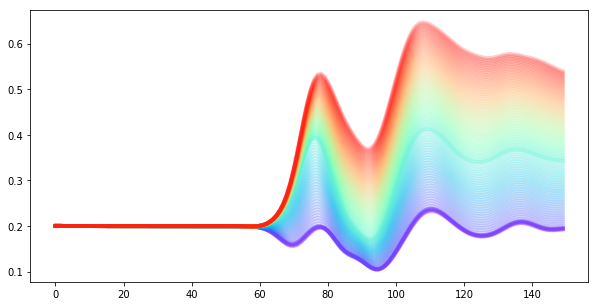

In [303]:
n_reach = len(reach_condition_list)
n_interps = 100
cmap = plt.get_cmap('rainbow')
for muscle in range(1):
    for x1 in range(n_reach-1):
        fig = plt.figure(figsize=(10, 5))
        for x in range(n_interps):
            plt.plot(emg_big[x+x1*n_interps,:,muscle],c = cmap(x/n_interps),alpha = .2, linewidth = 4)